Find the directivity of an array with four ULA isotropic radiators. Plot the max broadside directivity as a function of the element spacing over the range $0 \leq d \leq 3\lambda$.

Overlay the directivity obtained with the conjugate field match solution.

$$ D = N*D_{el} $$

How to do the max directivity element excitation currents behave for very small element spacings.

Step 1: Find the overlap matrix

$$ A_{mn} = P_{rad}\frac{\sin(kr_{mn})}{kr_{mn}} $$

Step 2: Find $E_p(r)$

$$ E_0 = \sqrt{\frac{2\eta P_{rad}}{4\pi r^2}} $$
$$ E_p = E_0 * [1, 1, 1, 1]^T $$

Step 3: Find the weights

$$ w = A^{-1}E_p(r) $$

Step 4: Find the maximum directivity

$$ D(\Omega)=\frac{4\pi r^2 w^H B w}{w^H A w} $$

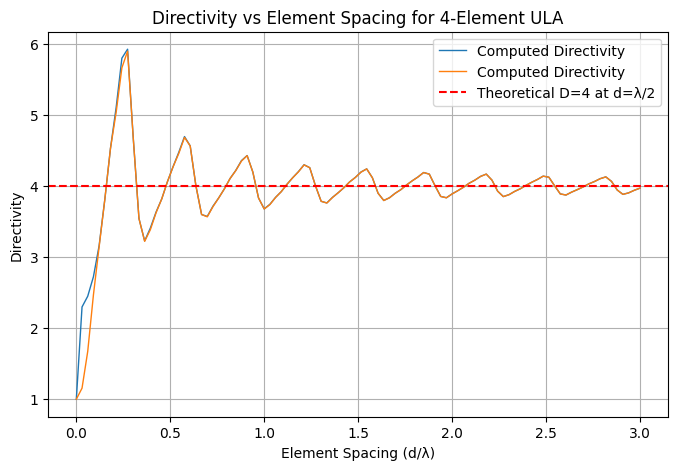

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Define antenna parameters
f = 1e9          # Frequency in Hz
c = 3e8          # Speed of light in m/s
lam = c / f      # Wavelength in m
k = 2 * np.pi / lam  # Wave number
eta = 377        # Intrinsic impedance of free space
Pel = 1          # Radiated power
r = 1            # Observation distance

# Define element spacing range
num_points = 100
d_values = np.linspace(0, 3*lam, num_points)  # Range of element spacings

# Number of elements in the array
N = 4

# Electric field calculation
E = np.sqrt(2*eta*Pel/(4*np.pi*r**2))
Ep = E*np.ones((N, 1))

# conjugate matched weights
w_cm = Ep

# empty array of directivity values
directivity_values = []
directivity_values_cm = []

def compute_overlap(rx, k):
    # Compute overlap matrix A
    A = np.zeros((N, N))
    for m in range(N):
        for n in range(N):
            r_mn = abs(rx[m] - rx[n])  # Distance between elements
            A[m, n] = np.sinc(k * r_mn)  # Corrected sinc function
    #print("Overlap Matrix \n", A)
    return A

def compute_weights(A, Ep):
    # Compute weights
    A_inv = np.linalg.pinv(A)
    w = np.dot(A_inv, Ep)  #weights
    #print("weights \n", w)
    return w

def compute_B(Ep):
    B = (1 / (2 * eta)) * Ep * Ep.conj().T
    #print("Bs \n", B)
    return B

def compute_directivity(r,w,B,A):
    # Compute Directivity
    w_herm = w.conj().T
    #print("hermitian of weights \n", w_herm)
    scalar = 4 * np.pi * (r**2)
    num_1 = np.dot(w_herm, B)
    num_2 = np.dot(num_1, w)
    den_1 = np.dot(w_herm, A)
    den_2 = np.dot(den_1, w)
    D = scalar * num_2 / den_2
    #print("Directivity \n", D)
    return D

for d in d_values:
    # Define the receiver positions
    rx = np.array([n * d for n in range(N)])  # Positions of elements
    
    # Compute overlap matrix A
    A = compute_overlap(rx, k)

    # Compute weights
    w = compute_weights(A, Ep)

    # compute B
    B = compute_B(Ep)

    # compute directivity
    D = compute_directivity(r, w, B, A)
    D_cm = compute_directivity(r, w_cm, B, A)


    directivity_values.append(D[0,0])
    directivity_values_cm.append(D_cm[0,0])


# Plot results
plt.figure(figsize=(8, 5))
plt.plot(d_values / lam, directivity_values, label="Computed Directivity", linewidth=1)
plt.plot(d_values / lam, directivity_values_cm, label="Computed Directivity", linewidth=1)
plt.axhline(y=N, color='r', linestyle='--', label="Theoretical D=4 at d=λ/2")  # Reference line at 4
plt.xlabel("Element Spacing (d/λ)")
plt.ylabel("Directivity")
plt.title("Directivity vs Element Spacing for 4-Element ULA")
plt.grid(True)
plt.legend()
plt.show()